In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random 
from mpl_toolkits import mplot3d


In [8]:
beta0 = np.arange(-2,2,0.1)
beta1 = np.arange(-2,2,0.1)

In [9]:
X, Y = np.meshgrid(beta0, beta1)

In [11]:
output = lambda t: 1/(1+np.exp(-(t)))
vfunc = np.vectorize(output)
loss=vfunc(X+Y)

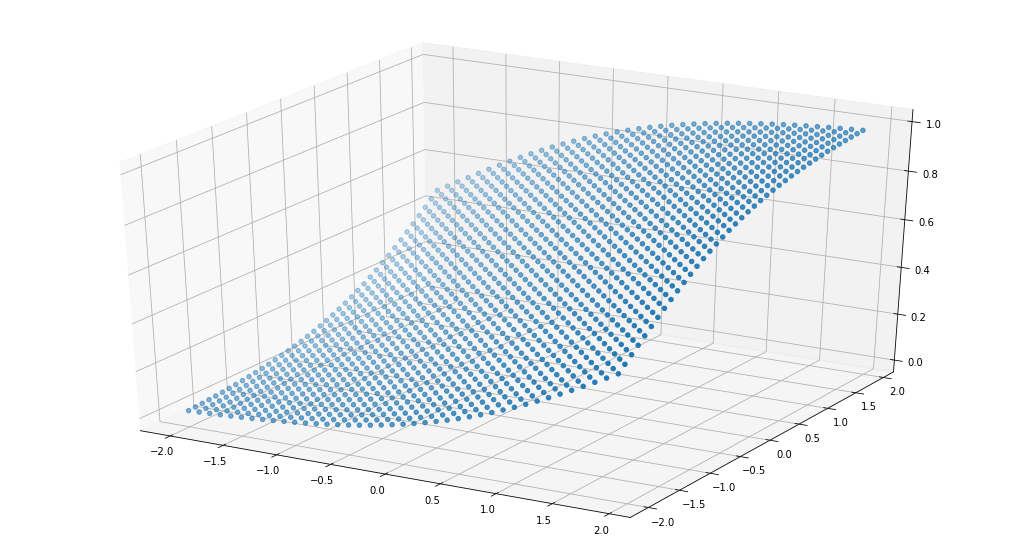

In [14]:
fig = plt.figure( figsize=(18, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, loss,  cmap='Greens');

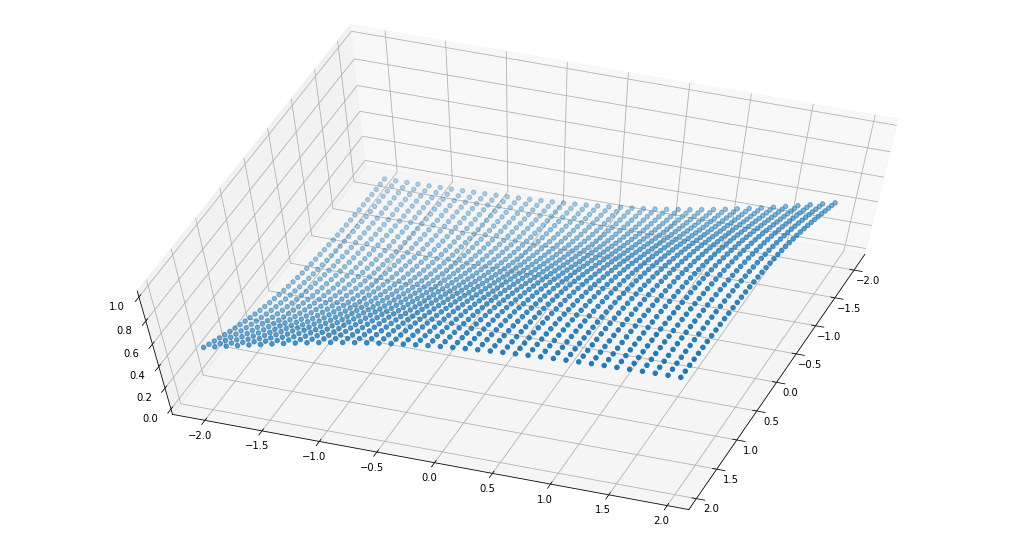

In [21]:
ax.view_init(65, 20)
fig

In [31]:
log_like = lambda t: -(np.log(1+np.exp(-1*t))+np.log(1+np.exp(1*t)))
log_like_func = np.vectorize(log_like)
log=log_like_func(X+Y)

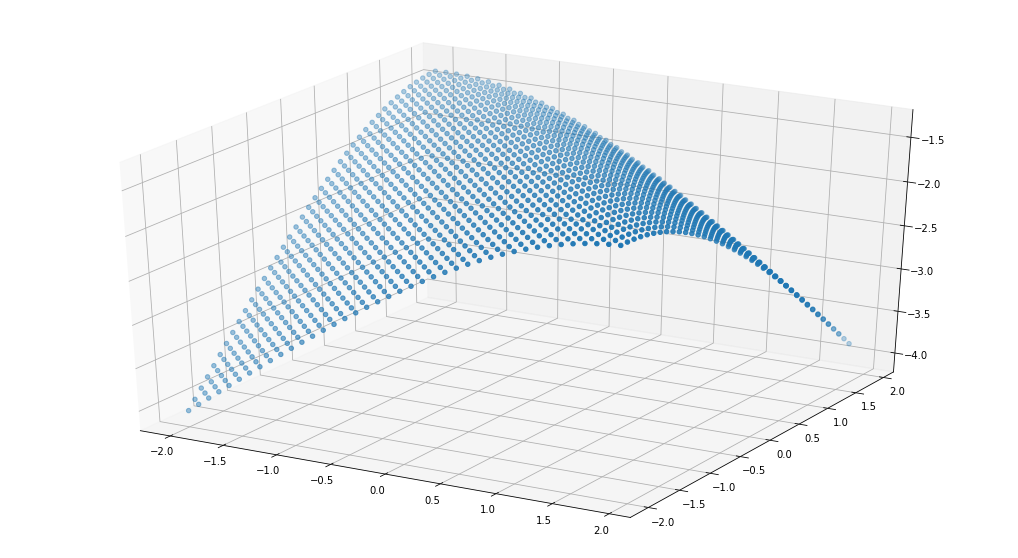

In [32]:
fig = plt.figure( figsize=(18, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, log,  cmap='Greens');

## Problem 2

### (a)

In [34]:
data=np.load('data.npy')
label=np.load('label.npy')

In [36]:
data.shape

(14780, 784)

In [42]:
def visulize(pixels,label):

    pixels = pixels.reshape((28, 28))

    # Plot
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    return plt.show()

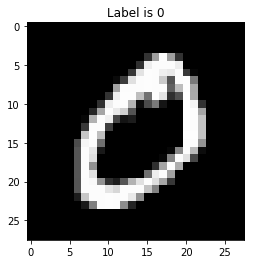

In [43]:
visulize(data[0],label[0])

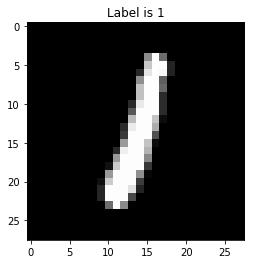

In [44]:
visulize(data[-1],label[-1])

### (b)

In [45]:
data=data/255

### (c)

In [48]:
label.shape

(14780,)

In [50]:
label.shape

(14780, 1)

### (d)

In [74]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

def compute_loss(X, y, w): 
    m = len(y)
    logloss = (1/m)*(np.sum( np.log(np.ones((m,1))+np.exp(np.multiply(-1*y,X @ w)))))
    return logloss

def compute_gradients(X, y, w): 
    m = len(y)
    dw=(1/m)*((np.sum((np.exp(np.multiply(-1*y,X @ w))/(np.exp(np.multiply(-1*y,X @ w))+1))*(X*-1*y), axis=0))).reshape((-1, 1))
    return dw

def compute_accuracy(X, y,w):
    p=np.multiply(y,X @ w)
    acc=len(p[p>0])/len(p)
    return acc

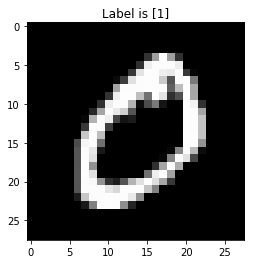

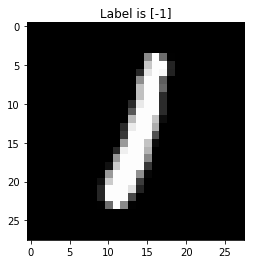

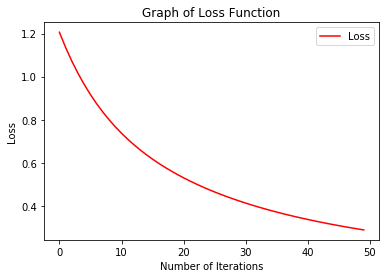

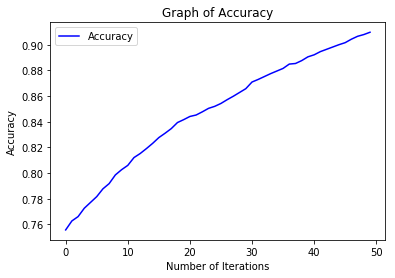

In [75]:
if __name__ == '__main__': 
    X = np.load('data.npy')
    y = np.load('label.npy')
    ## Split the data to train and test
    y=np.array([1 if i==0 else -1 for i in y]).reshape((-1, 1))
    
    visulize(data[0],label[0])
    visulize(data[-1],label[-1])
    
    X = np.hstack((np.ones((len(y),1)),X/255))
    x_train, x_test, y_train,  y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#     B = np.random.randn(1, x.shape[1]) 
#     B_0 = np.random.randn(1)

    w = (np.random.randn(np.size(X,1))).reshape((-1,1))
    lr = 0.05
    accuracy_test=[]
    loss_test=[]
    for _ in range(50):
        ## Compute Loss
        loss = compute_loss(x_train, y_train, w)
        ## Compute Gradients
        dw = compute_gradients(x_train, y_train, w)
        ## Update Parameters
        w=w-lr*dw

        ##Compute Accuracy and Loss on Test set (x_test, y_test)
        accuracy_test.append(compute_accuracy(x_test, y_test,w))
        loss_test.append(compute_loss(x_test, y_test,w))

    ##Plot Loss and Accuracy
    plt.figure()
    # sns.set_style('white')
    plt.plot(range(len(loss_test)), loss_test, label='Loss',color='r')
    plt.title("Graph of Loss Function")
    plt.legend(loc='best')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss")
    plt.show()
    
    
    plt.figure()
    # sns.set_style('white')
    plt.plot(range(len(accuracy_test)), accuracy_test, label='Accuracy', color='b')
    plt.title("Graph of Accuracy")
    plt.legend(loc='best')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy")
    plt.show()

In [76]:
y.shape

(14780, 1)

In [78]:
X.shape

(14780, 785)

## Problem 3